In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
out_data_dir = "../data/out"
in_data_dir = "../data/in"

In [4]:
def get_data_points(csv_path, sep=",", date_col="time"):    
    # read file
    data_points = pd.read_csv(csv_path, sep)
    
    # convert time
    data_points[date_col] = data_points[date_col].apply(lambda x: datetime.utcfromtimestamp(x))
    
    # set index
    data_points.set_index(date_col, inplace=True)

    return data_points

In [5]:
open_points = get_data_points(os.path.join(out_data_dir, "open_points.csv"))
close_points = get_data_points(os.path.join(out_data_dir, "closed_points.csv"))
mean_price_points = get_data_points(os.path.join(out_data_dir, "mean_price_points.csv"))
indics_points = get_data_points(os.path.join(out_data_dir, "indicator_values.csv"))

In [6]:
ohlc = get_data_points(os.path.join(in_data_dir, "btc-usdt-30-min.csv"), sep=";")

In [7]:
# reindex
open_points = open_points.reindex(ohlc.index)
close_points = close_points.reindex(ohlc.index)
mean_price_points = mean_price_points.reindex(ohlc.index)
indics_points = indics_points.reindex(ohlc.index)

<IPython.core.display.Javascript object>


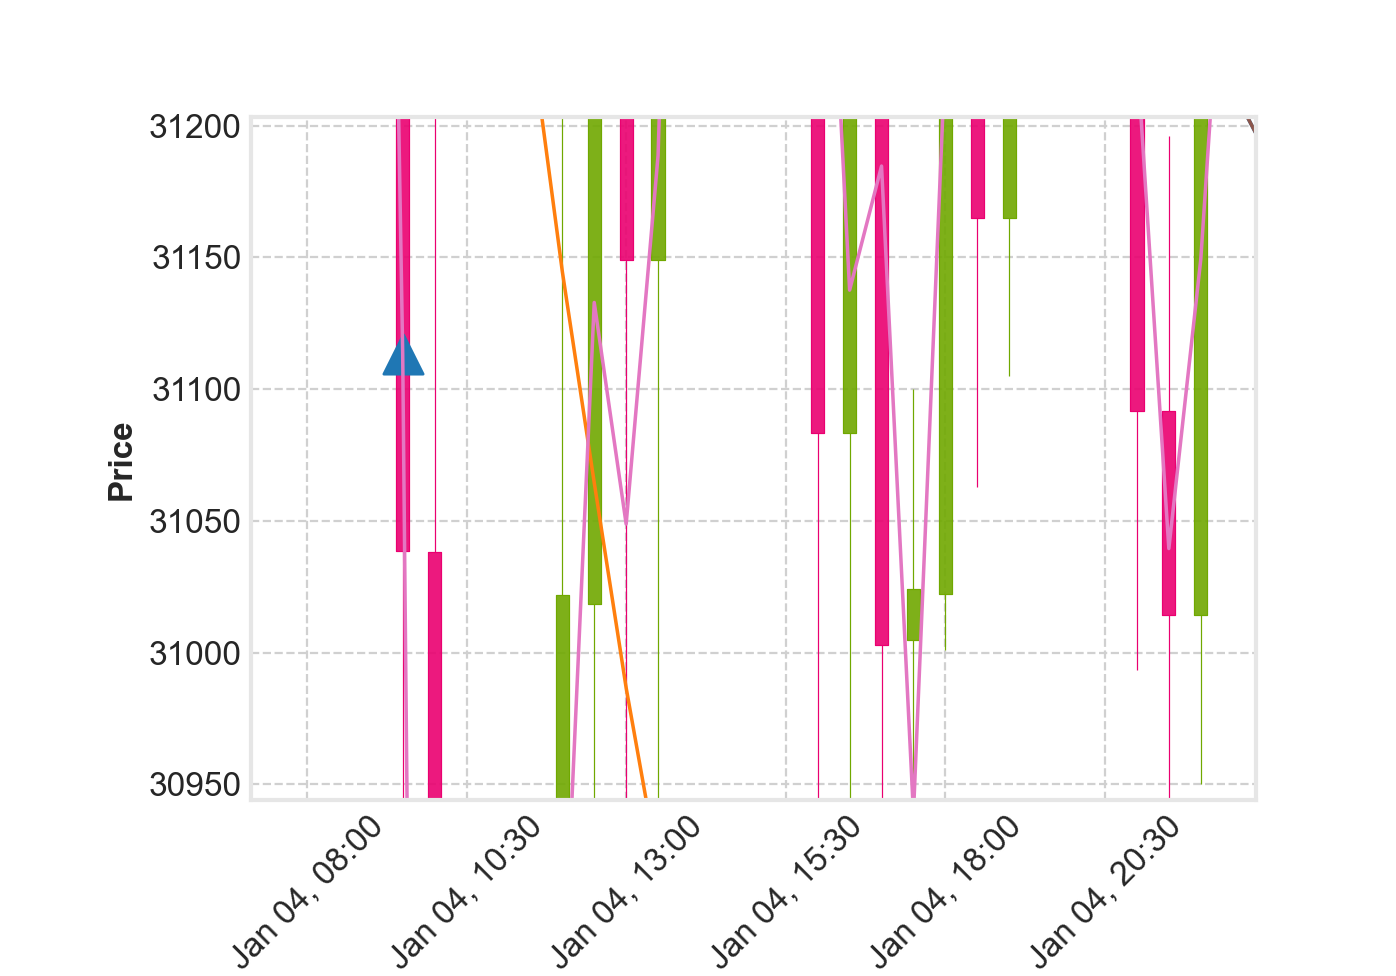

In [11]:
# https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=fe985a0b81537cefe145a861aa8ef86edf08292c&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d6174706c6f746c69622f6d706c66696e616e63652f666539383561306238313533376365666531343561383631616138656638366564663038323932632f6578616d706c65732f616464706c6f742e6970796e62&logged_in=false&nwo=matplotlib%2Fmplfinance&path=examples%2Faddplot.ipynb&platform=android&repository_id=226144726&repository_type=Repository&version=99
n_candles = 250

addons = [
    mpf.make_addplot(indics_points.head(n_candles)),
    mpf.make_addplot(mean_price_points.head(n_candles)),
    mpf.make_addplot(open_points.head(n_candles), type='scatter', markersize=200, marker='^'),
    mpf.make_addplot(close_points.head(n_candles), type='scatter', markersize=200, marker='v'),
]
mpf.plot(ohlc.head(n_candles), addplot=addons, type='candle', style='binance', figratio=(20,14), figscale=0.85)